In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [102]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [103]:
train.shape

(6368, 15)

In [104]:
test.shape

(3430, 14)

In [105]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [106]:
test.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price'],
      dtype='object')

In [107]:
train.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

In [108]:
test.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail        int64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price         int64
dtype: object

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [111]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [112]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [113]:
test.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
count,3429.000000,3430.000000,3430.000000,3430.000000,3430.000000,3394.000000,3425.000000,3416.000000,3430.000000
mean,25.633421,196.693878,0.667638,49.917493,0.146356,265.484973,10.436204,3444.206089,6234.062391
std,14.389747,168.832500,1.045914,28.587214,0.353514,125.325455,4.232382,2178.418557,3575.968650
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,163.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,162.000000,7.000000,1834.000000,3819.000000
50%,26.000000,124.000000,0.000000,50.000000,0.000000,252.000000,11.000000,3060.500000,5431.000000
75%,38.000000,358.000000,2.000000,74.000000,0.000000,319.000000,14.000000,4606.500000,7796.500000
max,50.000000,471.000000,3.000000,100.000000,1.000000,648.000000,17.000000,17182.000000,27954.000000


In [114]:
columns = ["Stall_no", "Product_id", "instock_date","Customer_name","Loyalty_customer", "Product_Category"]
train = train.drop(columns=columns)

In [115]:
train = train.dropna()

In [116]:
train = train[train["Selling_Price"] > 0]

In [117]:
X = train.drop(['Selling_Price'],axis=1)
y = train[['Selling_Price']]

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5562 entries, 0 to 6367
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market_Category  5562 non-null   int64  
 1   Grade            5562 non-null   int64  
 2   Demand           5562 non-null   int64  
 3   Discount_avail   5562 non-null   float64
 4   charges_1        5562 non-null   float64
 5   charges_2 (%)    5562 non-null   float64
 6   Minimum_price    5562 non-null   float64
 7   Maximum_price    5562 non-null   float64
 8   Selling_Price    5562 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 434.5 KB


In [119]:
train.head(5)

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [120]:
train.columns

Index(['Market_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [121]:
train.shape

(5562, 9)

In [122]:
test.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price'],
      dtype='object')

In [123]:
test.shape

(3430, 14)

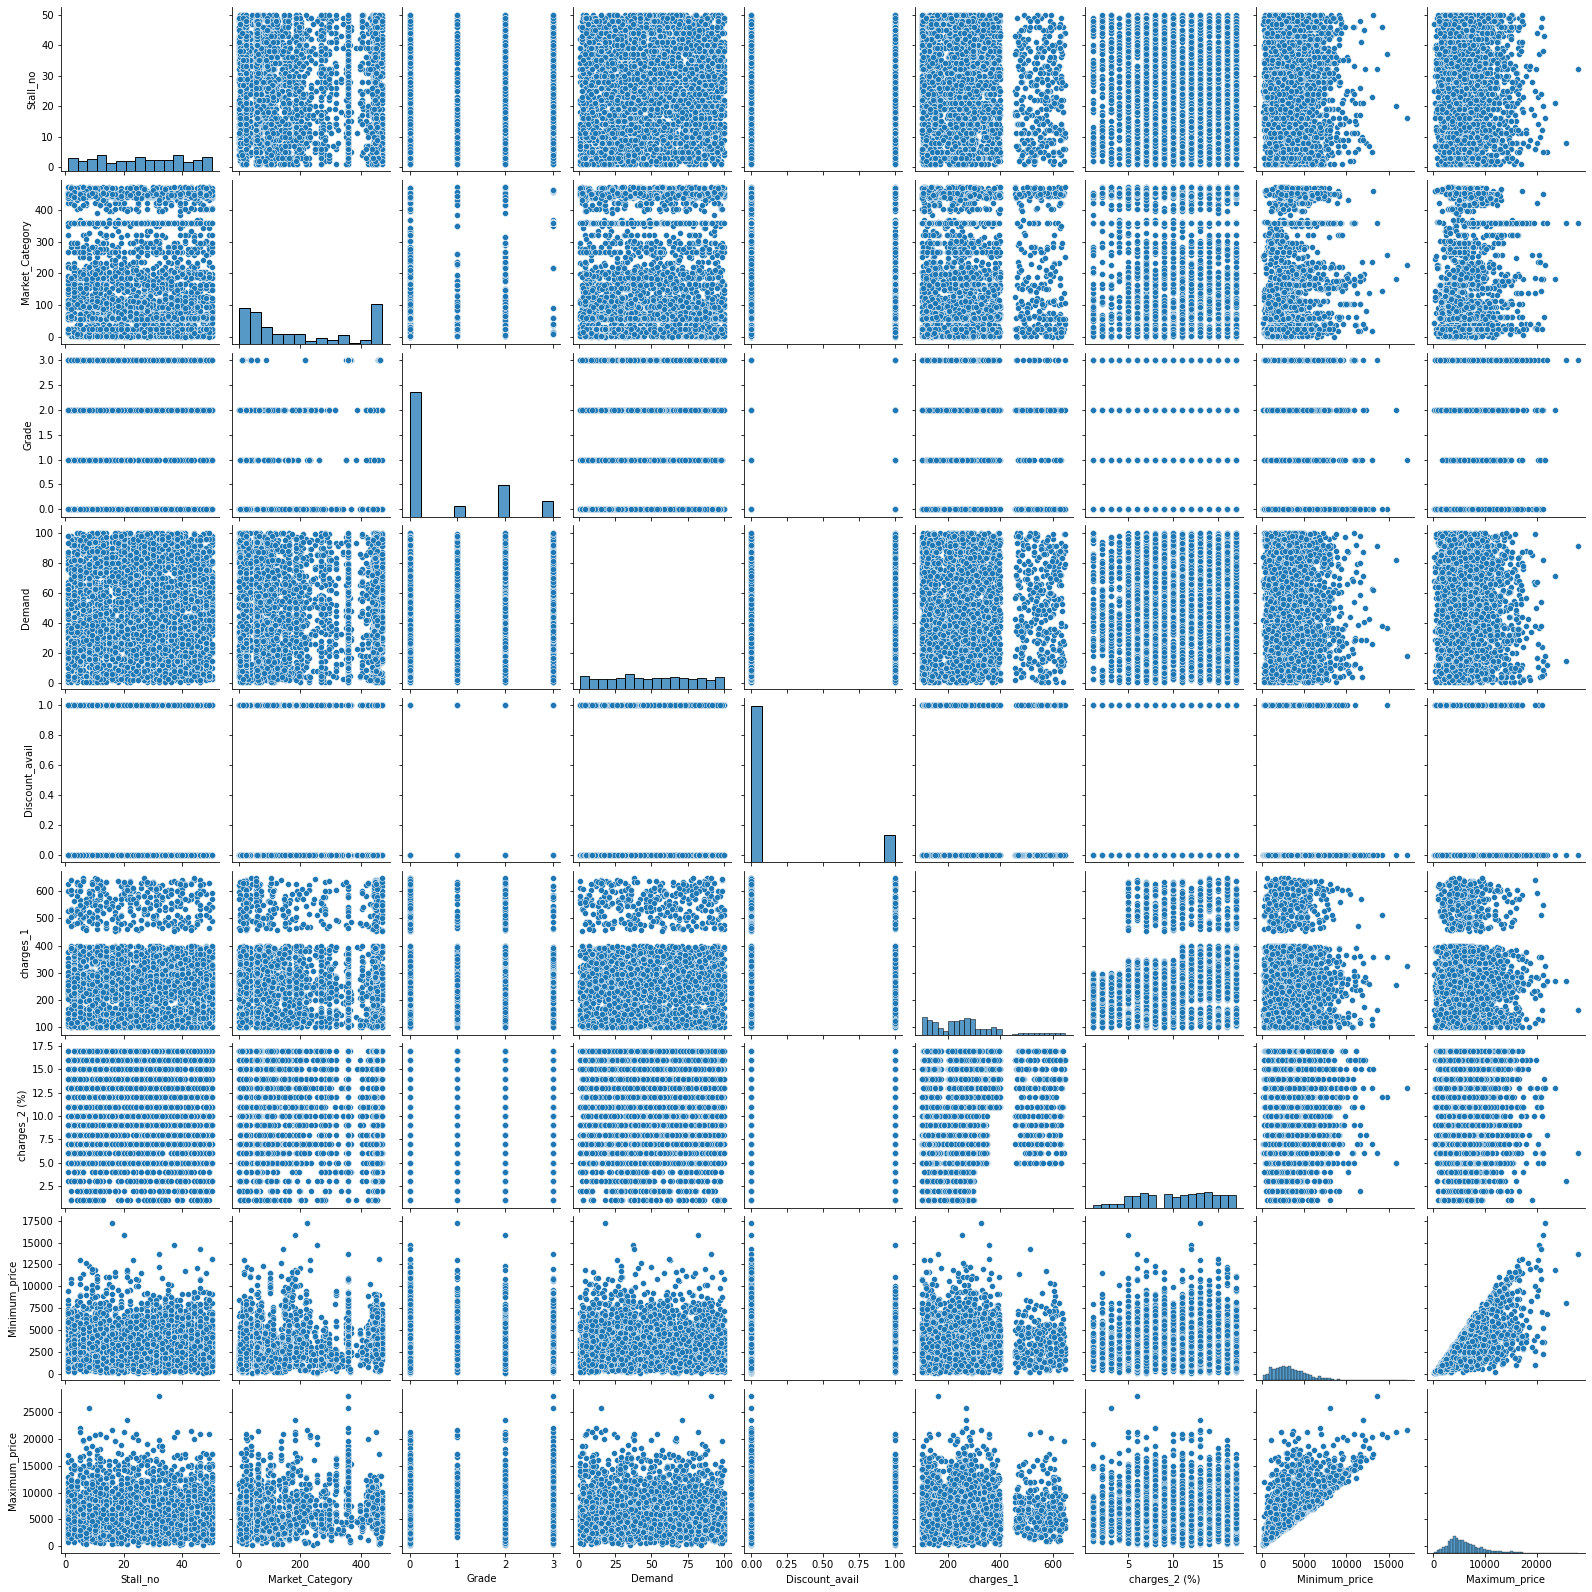

In [124]:
sns.pairplot(test)

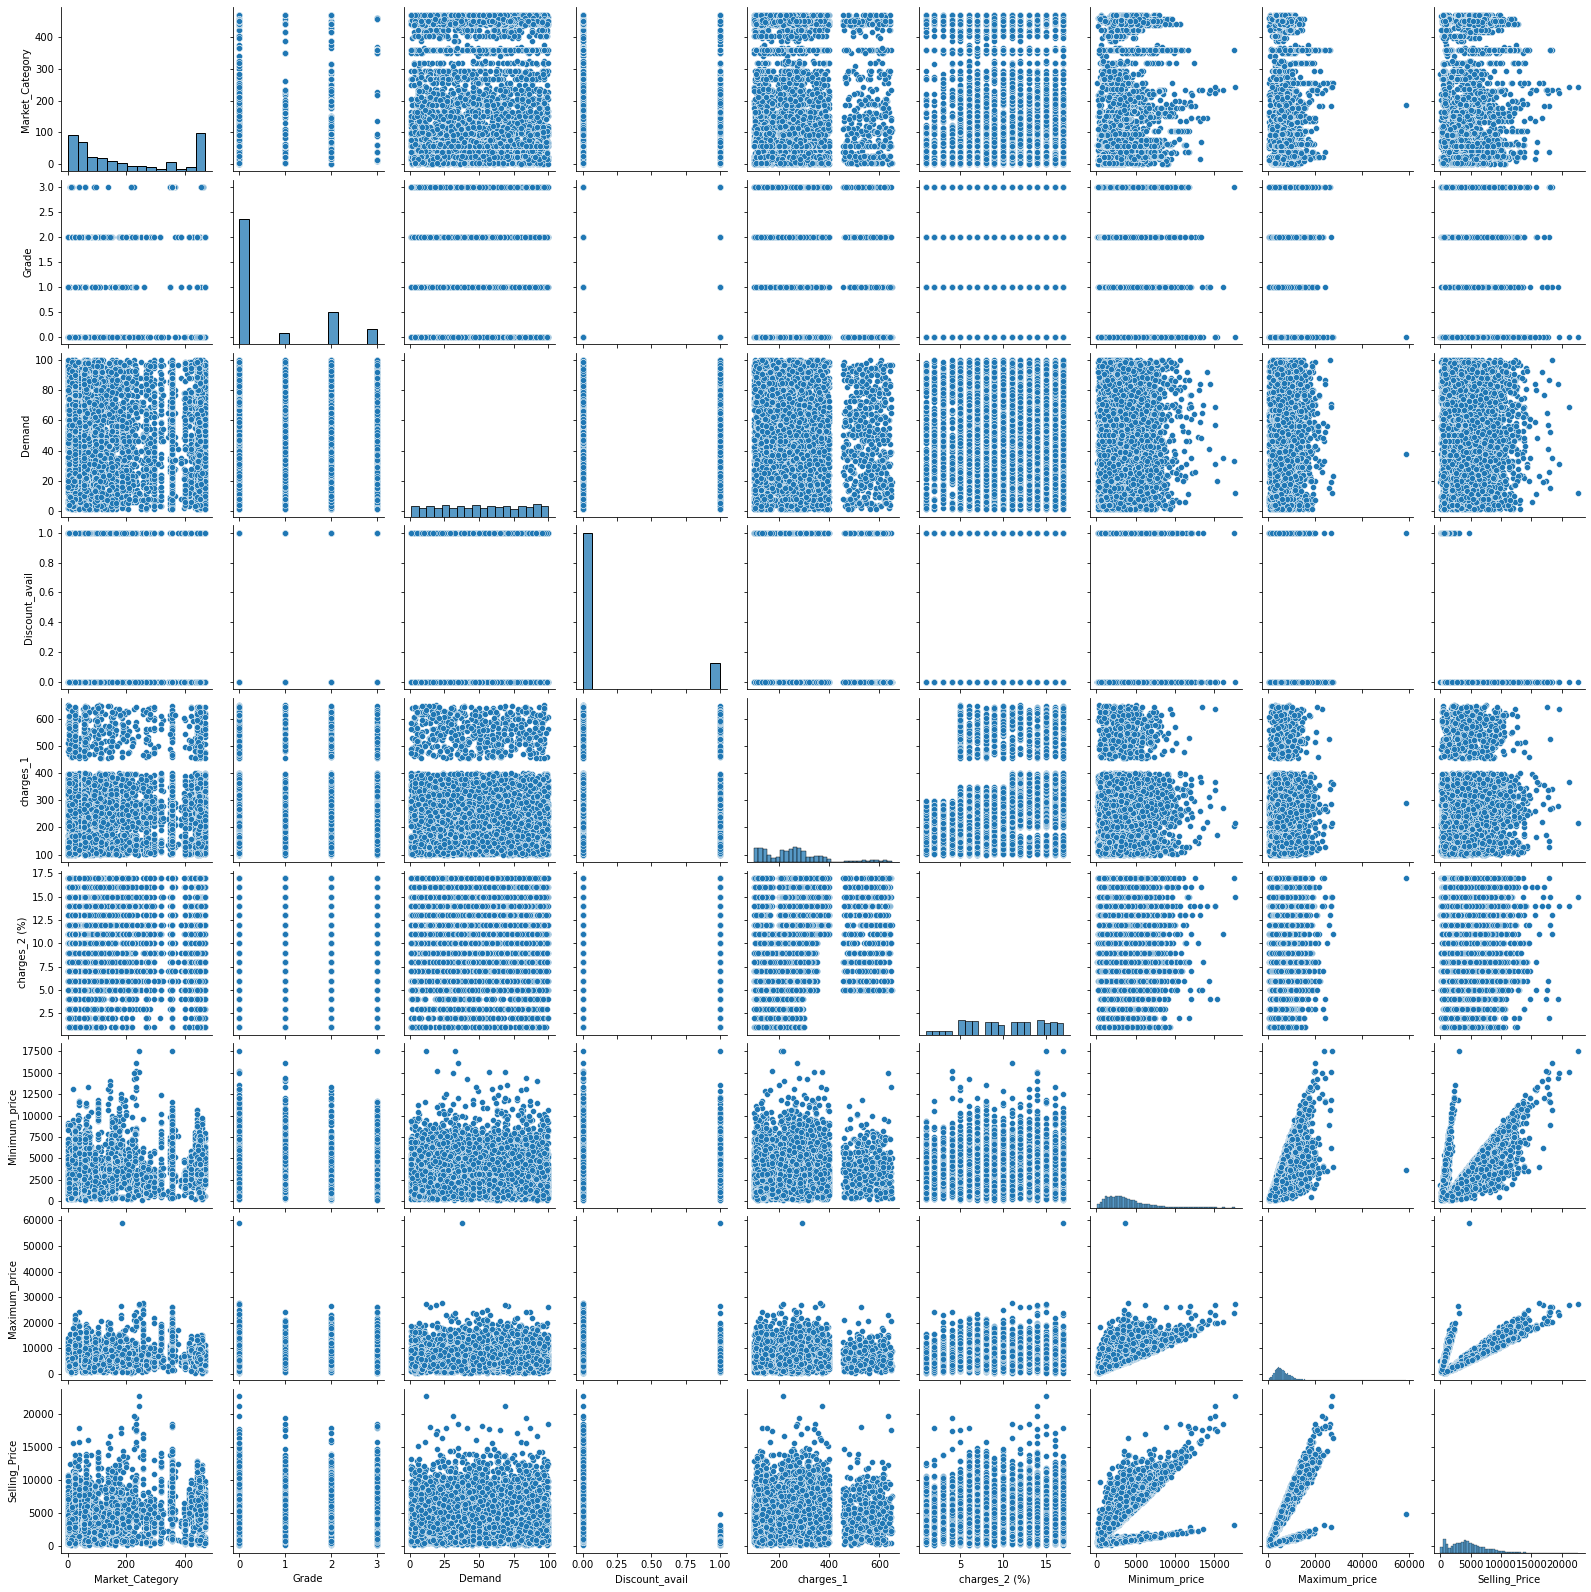

In [125]:
sns.pairplot(train)

<AxesSubplot:>

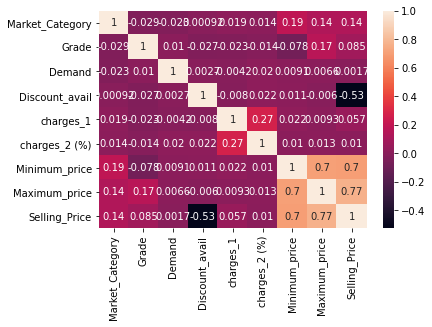

In [126]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

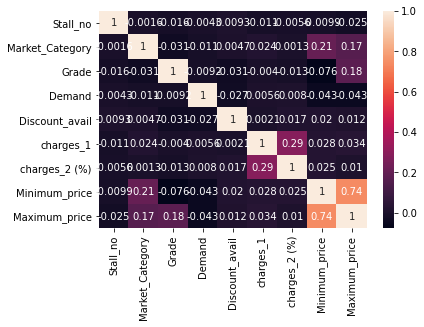

In [127]:
sns.heatmap(test.corr(),annot=True)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=1)

In [129]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [130]:
#train.shape
#train.info()

In [131]:
reg_model.score(X_train, y_train)

0.9279183264157767

In [132]:
reg_model.score(X_test, y_test)

0.89777513060092

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [134]:
lm = LinearRegression()

In [135]:
lm.fit(X_train,y_train)

LinearRegression()

In [136]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [584.71709741]


In [137]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[ 6.35140774e-02  4.78374872e+00 -5.59737209e-01 -4.42043602e+03
   1.02524239e+00  8.05182965e-01  3.98132111e-01  4.59684865e-01]]


In [138]:
train_pred = lm.predict(X_train)

In [139]:
metrics.mean_squared_error(y_train,train_pred)

651533.2979705352

In [140]:
test_pred = lm.predict(X_test)

In [141]:
metrics.mean_squared_error(y_test,test_pred)

898159.089346162

In [142]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1669, 1)


In [143]:
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Root mean square error (RMSE): 947.7125562881195


In [144]:
train.isna().sum()

Market_Category    0
Grade              0
Demand             0
Discount_avail     0
charges_1          0
charges_2 (%)      0
Minimum_price      0
Maximum_price      0
Selling_Price      0
dtype: int64

In [145]:
lr_predicted_train=abs(lm.predict(X_train))

In [146]:
RMSLE = np.sqrt(metrics.mean_squared_log_error(y_train,lr_predicted_train))
score = max(0,100 - RMSLE)
print("train_score =", score)

train_score = 99.52519232367722


In [147]:
test.mean()

Stall_no             25.633421
Market_Category     196.693878
Grade                 0.667638
Demand               49.917493
Discount_avail        0.146356
charges_1           265.484973
charges_2 (%)        10.436204
Minimum_price      3444.206089
Maximum_price      6234.062391
dtype: float64

In [148]:
meanFiller = lambda x: x.fillna(x.mean())
test[['Market_Category','Grade','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']] = test[['Market_Category','Grade','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']].apply(meanFiller,axis=0)

In [149]:
test['Selling_Price']=lm.predict(test[['Market_Category','Grade','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']])

In [150]:
test[['Product_id','Selling_Price']].to_csv('result.csv',index=False)